In [2]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# cargar los datos
df = pd.read_csv('espectros_SNG.csv')

# separar las características (X) y la etiqueta (y)
X = df.drop('id', axis=1)
y = df['id']

# codificar la etiqueta (y)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [3]:
df['id'].unique()

array([2, 3, 1], dtype=int64)

In [4]:
# crear el modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(3, activation='softmax')
])

# compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [5]:
# entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
319/319 [==============================] - 12s 24ms/step - loss: 0.1603 - accuracy: 0.9600 - val_loss: 0.0879 - val_accuracy: 0.9729
Epoch 2/50
319/319 [==============================] - 6s 20ms/step - loss: 0.1151 - accuracy: 0.9735 - val_loss: 0.0888 - val_accuracy: 0.9741
Epoch 3/50
319/319 [==============================] - 5s 16ms/step - loss: 0.1077 - accuracy: 0.9747 - val_loss: 0.0829 - val_accuracy: 0.9761
Epoch 4/50
319/319 [==============================] - 5s 17ms/step - loss: 0.1022 - accuracy: 0.9749 - val_loss: 0.0712 - val_accuracy: 0.9788
Epoch 5/50
319/319 [==============================] - 5s 15ms/step - loss: 0.0981 - accuracy: 0.9771 - val_loss: 0.0799 - val_accuracy: 0.9784
Epoch 6/50
319/319 [==============================] - 2s 7ms/step - loss: 0.0949 - accuracy: 0.9787 - val_loss: 0.0652 - val_accuracy: 0.9812
Epoch 7/50
319/319 [==============================] - 1s 3ms/step - loss: 0.0880 - accuracy: 0.9803 - val_loss: 0.0718 - val_accuracy: 0.9792


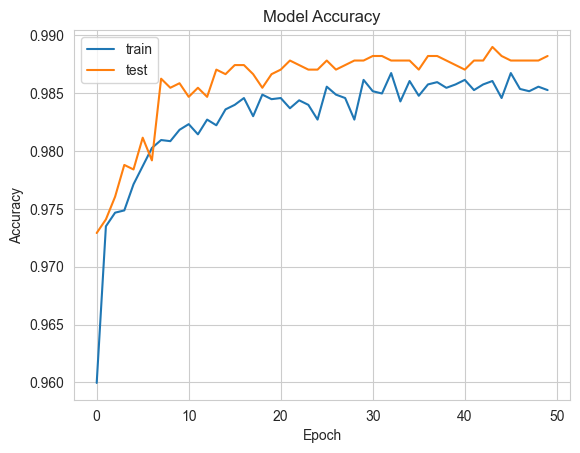

In [6]:
# graficar la precisión de entrenamiento y prueba
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [7]:
y=df['id']
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(y)
encoder = LabelEncoder()
df['codificado'] = encoder.fit_transform(df['id'])

nombres_etiquetas = encoder.classes_
nuevos_nombres = ['Symbiotics', 'Planetary Nebulae', 'Red Giants']
nombres_etiquetas_dict = {nombres_etiquetas[i]: nuevos_nombres[i] for i in range(len(nombres_etiquetas))}
df['nombres_etiquetas'] = df['id'].map(nombres_etiquetas_dict)

df_agrupado = df.groupby('nombres_etiquetas')['codificado'].mean()
print(df_agrupado)

nombres_etiquetas
Planetary Nebulae    1.0
Red Giants           2.0
Symbiotics           0.0
Name: codificado, dtype: float64


In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix

# predecir las probabilidades para los datos de prueba
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix(y_test, y_pred)
print(cm)


80/80 [==============================] - 1s 3ms/step
[[  31    2    7]
 [   4   76   15]
 [   0    2 2411]]


In [13]:
import csv
# Save as CSV
with open("cm_rna_unbalanced.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(cm)

In [9]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.8857    0.7750    0.8267        40
           1     0.9500    0.8000    0.8686        95
           2     0.9910    0.9992    0.9950      2413

    accuracy                         0.9882      2548
   macro avg     0.9422    0.8581    0.8968      2548
weighted avg     0.9878    0.9882    0.9877      2548



In [10]:
from sklearn.metrics import  accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9882260596546311


In [11]:
print("size of the splits")
print("X_train: ",  X_train.shape)
print("X_test: ",  X_test.shape)
print("y_test: ",  y_test.size)
print("y_pred: ",  y_pred.size)

size of the splits
X_train:  (10189, 343)
X_test:  (2548, 343)
y_test:  2548
y_pred:  2548


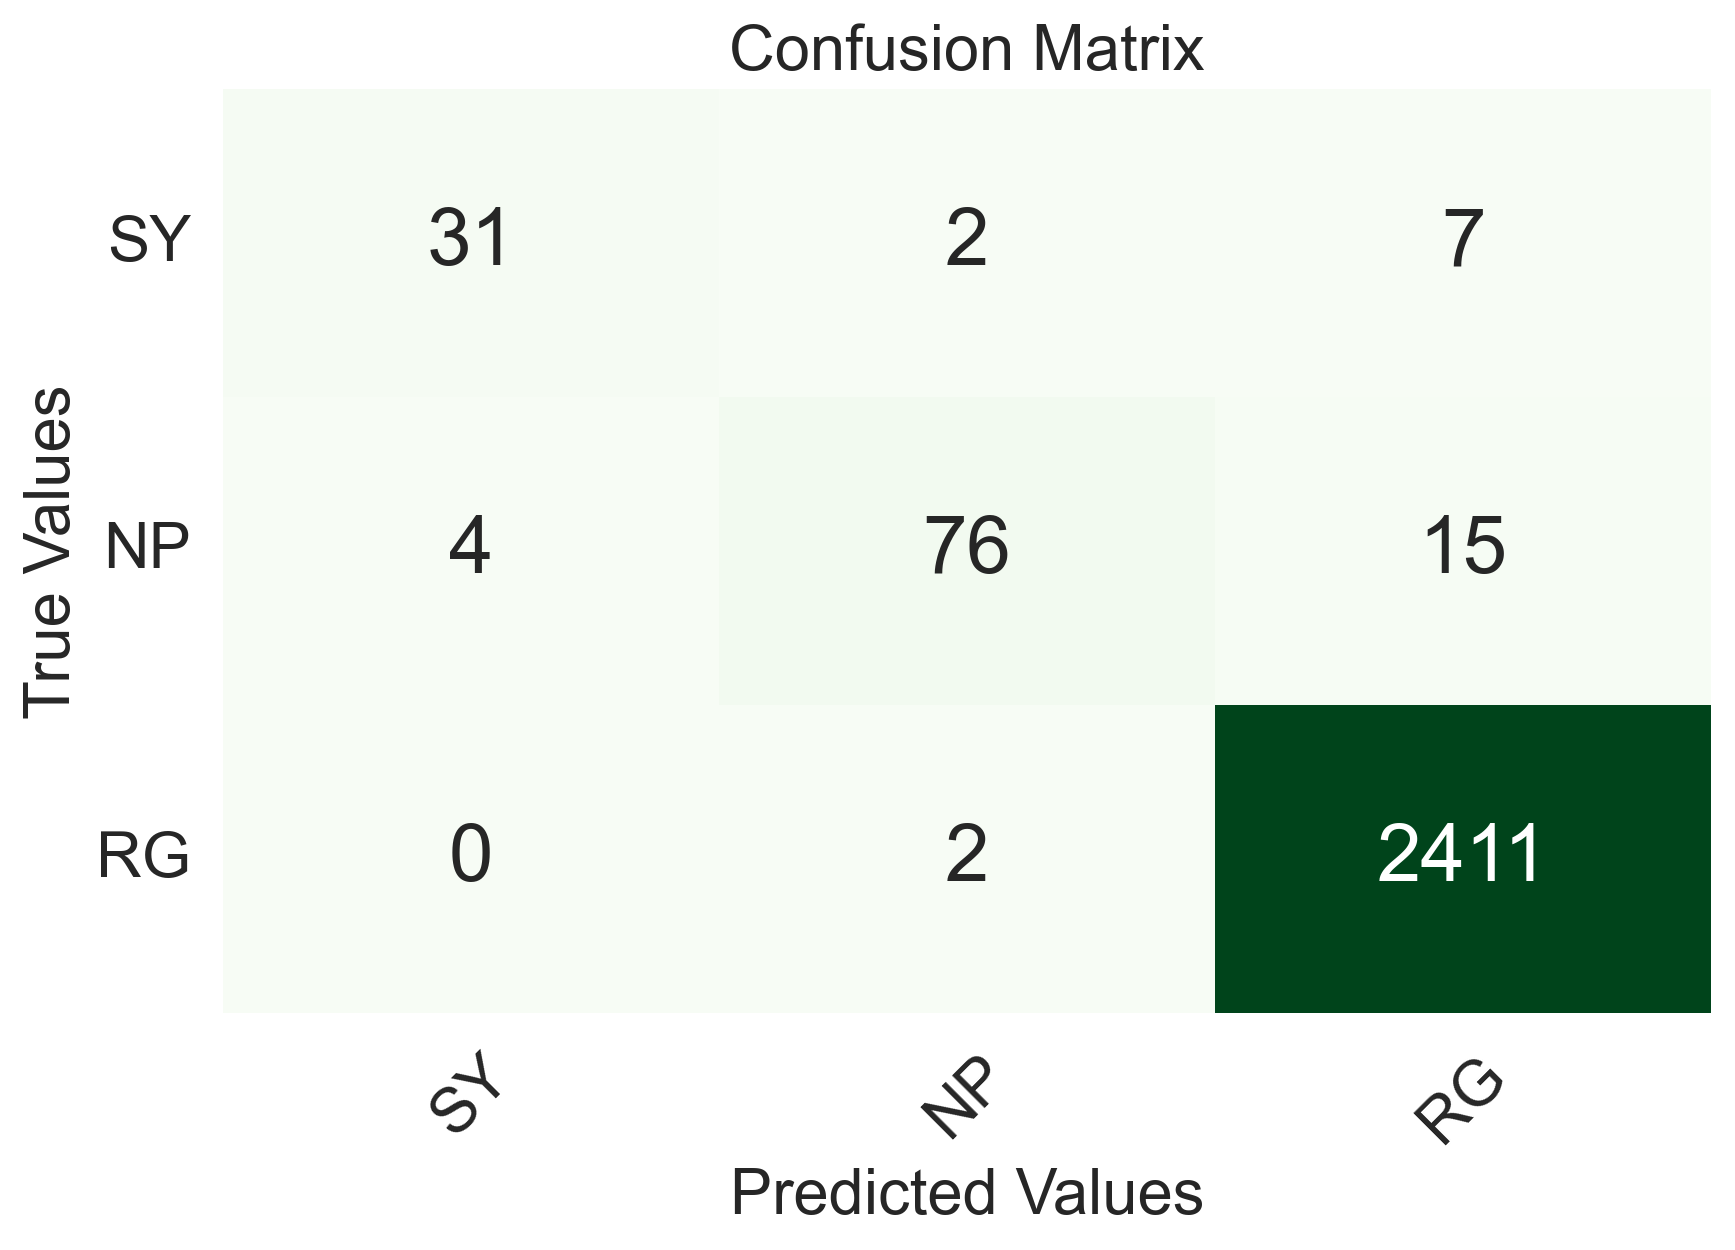

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 5), dpi=240)
    # plt.xticks(fontsize=12)
    # plt.yticks(fontsize=12)
    sns.set(font_scale=2.0)  # Set the font scale globally
    font_props = {'fontsize': 19}
    ax = sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', cbar=False)
    ax.set_xlabel('Predicted Values', fontdict=font_props)
    ax.set_ylabel('True Values', fontdict=font_props)
    ax.set_xticklabels(classes, rotation=45, fontdict=font_props)
    ax.set_yticklabels(classes, rotation=0, fontdict=font_props)
    ax.set_title('Confusion Matrix', fontdict=font_props)


# Ejemplo de uso
confusion_matrix = cm
class_names = ['SY', 'NP', 'RG']
plot_confusion_matrix(confusion_matrix, class_names)
plt.savefig('rna_unbalanced.svg', format="svg")
plt.show()